In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import string

In [52]:
data = pd.read_csv('hot_topics_data_100K.csv', index_col=0)
data.reset_index(drop=True, inplace=True)
data.head()

,FINDINGS,IMPRESSION
0,There is diffusion restriction present involvi...,Subacute infarction involving the right poster...
1,"Over the interval, previously demonstrated mod...","1.Over the interval, previously demonstrated m..."
2,PULMONARY ARTERIES: Diagnostic quality examina...,1.No evidence of pulmonary embolism.2.Centrilo...
3,Enteric tube seen curled on itself with tip ex...,No change in appearance of enteric tube as abo...
4,No intracranial hemorrhage is identified. No i...,1. No evidence of intracranial hemorrhage or m...


In [53]:
df_test = pd.read_csv('test_set_2000.csv', index_col=0)
df_test

,FINDINGS,IMPRESSION
index,,
0,There is diffusion restriction present involvi...,Subacute infarction involving the right poster...
1,"Over the interval, previously demonstrated mod...","1.Over the interval, previously demonstrated m..."
2,PULMONARY ARTERIES: Diagnostic quality examina...,1.No evidence of pulmonary embolism.2.Centrilo...
3,Enteric tube seen curled on itself with tip ex...,No change in appearance of enteric tube as abo...
4,No intracranial hemorrhage is identified. No i...,1. No evidence of intracranial hemorrhage or m...
...,...,...
2015,Right temporal lobe encephalomalacia is grossl...,Grossly stable infarct in the right posterior ...
2016,ABDOMEN:LUNG BASES: Multiple bilateral lung no...,1.Large mass at the duodenal jejunal junction ...
2017,CHEST:LUNGS AND PLEURA: Apical scarring is pre...,No CT evidence of recurrence.


In [55]:
df_train_index = list(set(data.index) - set(df_test.index))
df_train = data.iloc[df_train_index, :]
df_train

,FINDINGS,IMPRESSION
372,There is redemonstration of C2 -occipital fusi...,1. Interval fracture of right C2 laminar screw...
692,No acute fracture or dislocation.,Normal examination.
744,There is no evidence of intracranial hemorrhag...,Normal brain CT.
840,There is no evidence of intracranial hemorrhag...,Normal brain CT.
847,There is no evidence of intracranial hemorrhag...,Normal brain CT.
...,...,...
99995,ABDOMEN: Please note that within the limits of...,1. Small right groin hematoma without evidence...
99996,The patient has undergone ACL reconstruction w...,Postsurgical changes of prior ACL reconstructi...
99997,LUNGS AND PLEURA: Scattered pulmonary micronod...,Right upper lobe interstitial opacity of uncer...
99998,A left temporoparietal subdural hematoma is id...,1.Large left subdural and left temporal intrap...


In [56]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [57]:
df_train.shape

(98000, 2)

In [58]:
df_test.shape

(2000, 2)

In [59]:
def remove_nonstr(dataframe, col1='IMPRESSION', col2='FINDINGS'):
    
    '''
    There are some summary are of type None, so we remove those observations
    '''
    
    print ('there are {} empty observations in col1'.format(len(np.where([type(i) != str for i in dataframe[col1]])[0])))
    print ('there are {} empty observations in col2'.format(len(np.where([type(i) != str for i in dataframe[col2]])[0])))
    dataframe = dataframe.drop(dataframe.index[np.where([type(i) != str for i in dataframe[col1]])])
    dataframe = dataframe.reset_index(drop = True)
    dataframe = dataframe.drop(dataframe.index[np.where([type(i) != str for i in dataframe[col2]])])
    dataframe = dataframe.reset_index(drop = True)
                                                 
    return dataframe
                                               
df_train = remove_nonstr(df_train)
df_test = remove_nonstr(df_test)

there are 0 empty observations in col1
there are 0 empty observations in col2
there are 0 empty observations in col1
there are 0 empty observations in col2


In [60]:
'''
Remove \n from rows
'''
for col in df_train.columns:
    df_train[col] = [r.replace('\n','') if type(r) == str else r for r in df_train[col]]
    df_train[col] = [r.replace('\n\n','') if type(r) == str else r for r in df_train[col]]
    
'''
Remove trailing spaces from rows
'''
for col in df_train.columns:
    df_train[col] = [r.strip() if type(r) == str else r for r in df_train[col]]
    
'''
Remove \n from rows
'''
for col in df_test.columns:
    df_test[col] = [r.replace('\n','') if type(r) == str else r for r in df_test[col]]
    df_test[col] = [r.replace('\n\n','') if type(r) == str else r for r in df_test[col]]
    
'''
Remove trailing spaces from rows
'''
for col in df_test.columns:
    df_test[col] = [r.strip() if type(r) == str else r for r in df_test[col]]

In [61]:
def remove_emptystr(dataframe,col1 ='IMPRESSION' ,col2 ='FINDINGS' ):
    
    '''
    There are some summary are of type None, so we remove those observations
    '''
    
    print ('there are {} empty observations in col1'.format(len(np.where([len(i) == 0 for i in dataframe[col1]])[0])))
    print ('there are {} empty observations in col2'.format(len(np.where([i == ' ' for i in dataframe[col2]])[0])))
    dataframe = dataframe.drop(dataframe.index[np.where([len(i) == 0 for i in dataframe[col1]])])
    dataframe = dataframe.reset_index(drop = True)
    dataframe = dataframe.drop(dataframe.index[np.where([i == ' ' for i in dataframe[col2]])])
    dataframe = dataframe.reset_index(drop = True)
    
                                               
    return dataframe

df_train = remove_emptystr(df_train)
df_test = remove_emptystr(df_test)

there are 0 empty observations in col1
there are 0 empty observations in col2
there are 0 empty observations in col1
there are 0 empty observations in col2


In [62]:
'''
Remove impression or finding of lenghth smaller than 2 or None type
'''
res = []
for i in range(len(df_train['IMPRESSION'])):
    if (len(df_train['IMPRESSION'][i]) <= 2) | (len(df_train['FINDINGS'][i])<=2) | (df_train['FINDINGS'][i]==None)|(df_train['IMPRESSION'][i] == None):
               # print (i,all_parsed['FINDINGS'][i])
               res.append(i)

df_train = df_train.drop(df_train.index[res])
df_train = df_train.reset_index(drop=True) 

'''
Remove impression or finding of lenghth smaller than 2 or None type
'''
res = []
for i in range(len(df_test['IMPRESSION'])):
    if (len(df_test['IMPRESSION'][i]) <= 2) | (len(df_test['FINDINGS'][i])<=2) | (df_test['FINDINGS'][i]==None)|(df_test['IMPRESSION'][i] == None):
               # print (i,all_parsed['FINDINGS'][i])
               res.append(i)

df_test = df_test.drop(df_test.index[res])
df_test = df_test.reset_index(drop=True) 

In [65]:
'''
Remove \r from rows
'''
for col in df_train.columns:
    df_train[col] = [r.replace('\r','') if type(r) == str else r for r in df_train[col]]
    df_train[col] = [r.replace('\r\r','') if type(r) == str else r for r in df_train[col]]

df_train['IMPRESSION'] = df_train['IMPRESSION'].apply(lambda x: x.split('Report Electronically Signed')[0])

for index, row in df_train.iterrows():
    try:
        len(row['IMPRESSION'])
    except:
        print ('is float:',row['IMPRESSION'])
        df_train.drop(index, inplace=True)
        
for index, row in df_train.iterrows():
    try:
        len(row['FINDINGS'])
    except:
        print ('is float:',row['FINDINGS'])
        df_train.drop(index, inplace=True)
        
'''
Remove \r from rows
'''
for col in df_test.columns:
    df_test[col] = [r.replace('\r','') if type(r) == str else r for r in df_test[col]]
    df_test[col] = [r.replace('\r\r','') if type(r) == str else r for r in df_test[col]]

df_test['IMPRESSION'] = df_test['IMPRESSION'].apply(lambda x: x.split('Report Electronically Signed')[0])

for index, row in df_test.iterrows():
    try:
        len(row['IMPRESSION'])
    except:
        print ('is float:',row['IMPRESSION'])
        df_test.drop(index, inplace=True)
        
for index, row in df_test.iterrows():
    try:
        len(row['FINDINGS'])
    except:
        print ('is float:',row['FINDINGS'])
        df_test.drop(index, inplace=True)

In [66]:
df_train.shape

(98000, 2)

In [67]:
df_test.shape

(2000, 2)

## T5

Size of train dataset:  (98000,)
Size of test dataset:  (2000,)
 Example of text:  Clear lungs. No pleural effusion or pneumothorax. No acute bony abnormality. Normal heart size. Patient status post cholecystectomy. Patient status post sternotomy and CABG.
 Example of Summary:  No acute cardiopulmonary process on radiography.


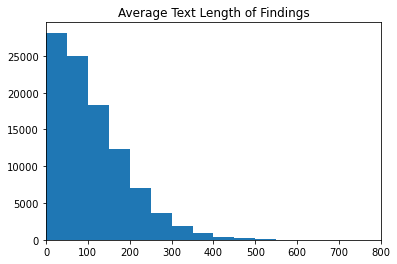

In [69]:
# Load Data from NLP Library
print("Size of train dataset: ", df_train['FINDINGS'].shape)
print("Size of test dataset: ", df_test['IMPRESSION'].shape)
# Look at Sample Examples
print(" Example of text: ", df_train['FINDINGS'][2000])
print(" Example of Summary: ", df_train['IMPRESSION'][2000])
# Average Length of Text and Summary
text_len = []
summary_len=[]
for i in range(df_train.shape[0]):
    text_example = df_train['FINDINGS'][i]
    text_example = text_example.replace('\n','')
    text_words = text_example.split()
    text_len.append(len(text_words))
    summary_example = df_train['IMPRESSION'][i]
    summary_example = summary_example.replace('\n','')
    summary_words = summary_example.split()
    summary_len.append(len(summary_words))
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(text_len, bins=np.arange(0, 800, 50))
plt.xlim([0, 800])
plt.title('Average Text Length of Findings')
plt.show()

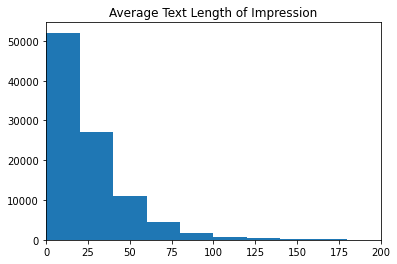

In [70]:
plt.hist(summary_len, bins=np.arange(0, 200, 20))
plt.xlim([0, 200])
plt.title('Average Text Length of Impression')
plt.show()

In [75]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')
res = []

for i in tqdm(range(df_test.shape[0])):
    inputs = tokenizer.batch_encode_plus(["summarize: " + df_test['FINDINGS'][i]], max_length=200, truncation=True, return_tensors="pt", pad_to_max_length=True)  # Batch size 1
    outputs = model.generate(inputs['input_ids'], num_beams=4, max_length=54, early_stopping=True)
    res.append([tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in outputs][0])

Some weights of T5ForConditionalGeneration were not initialized from the model checkpoint at t5-small and are newly initialized: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [76]:
res_s = pd.Series(res)
res_s.to_csv('t5_2000.csv', index=False)

In [77]:
from nltk.translate.bleu_score import sentence_bleu

def sentence_bleu_n(ref, hyp, weights):
  # ref and hyp are strings
  # bleu1: weights = [1, 0, 0, 0]
  # bleu2: weights = [.5, .5, 0, 0]
  # bleu3: weights = [.33, .33, .33, 0]
  # bleu3: weights = [.25, .25, .25, .25] <- default in sentence_bleu
  return sentence_bleu(references = [ref.split()], 
                       hypothesis = hyp.split(),
                       weights = weights)

df_test['SUMMARY'] = res_s

# bleu1
df_test['bleu1'] = df_test[['SUMMARY', 'IMPRESSION']].apply(lambda x: sentence_bleu_n(x[1], x[0], weights = [1,0,0,0]), axis=1)

# bleu2
df_test['bleu2'] = df_test[['SUMMARY', 'IMPRESSION']].apply(lambda x: sentence_bleu_n(x[1], x[0], weights = [.5,.5,0,0]), axis=1)

print('bleu1: {}'.format(df_test['bleu1'].mean()))
print('bleu2: {}'.format(df_test['bleu2'].mean()))

bleu1: 0.12733222583072706
bleu2: 0.07591165998798084


In [78]:
from rouge import Rouge 

# rouge1
df_test['rouge1'] = df_test[['SUMMARY', 'IMPRESSION']].apply(lambda x: Rouge().get_scores(x[0], x[1])[0]['rouge-1']['f'], axis=1)

# rouge2
df_test['rouge2'] = df_test[['SUMMARY', 'IMPRESSION']].apply(lambda x: Rouge().get_scores(x[0], x[1])[0]['rouge-2']['f'], axis=1)

print('rouge1: {}'.format(df_test['rouge1'].mean()))
print('rouge2: {}'.format(df_test['rouge2'].mean()))

rouge1: 0.19134528495475825
rouge2: 0.0899680521731839
